### BUSA8000 – Techniques in Business Analytics, Session 2, 2024
#### Assessment 1 Student_Name: Manuel Cabeza Student_ID: 48622605
I acknowledge that I have only used ChatGPT in having help to manage dates (clean it and strip it). Also for help in plotting techniques and to advice when needing to define functions

# Section 1: Data Cleansing 
    1.1 Read data and get to know it
    1.2 Find NAs and clean them
    1.3 Find wrong entries and clean them
    1.4 Find duplicates and clean them
    1.5 Find outliers and clean if any
    1.6 Find skewness and correct it if any


 ## 1.1 Read data and get to know it

In [1]:
 # first we import all the libraries needed
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings

cust_data = pd.read_csv ("customer_shopping_data.csv")
cust_data.head() 

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon


In [2]:
cust_data.shape # I am suppose to have 99461 row of data for each of the 10 columns
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99461 entries, 0 to 99460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99461 non-null  object 
 1   customer_id     99461 non-null  object 
 2   gender          99461 non-null  object 
 3   age             99461 non-null  int64  
 4   category        99461 non-null  object 
 5   quantity        99461 non-null  int64  
 6   price           99459 non-null  float64
 7   payment_method  99460 non-null  object 
 8   invoice_date    99461 non-null  object 
 9   shopping_mall   99461 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


  ## 1.2 Find NAs and clean them

In [3]:
#now let´s clean the data. The first thing we are going to do is find how many NA we have
#we can notice that price is missing only 2 rows, and payment_method 1, 
missing_data = cust_data.isnull().sum()
missing_data

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             2
payment_method    1
invoice_date      0
shopping_mall     0
dtype: int64

In [4]:
#we are going to drop those rows as there is only 3 of them and it shouldn´t affect our data
cust_data1 = cust_data.dropna(subset=["price"])
cust_data1 = cust_data1.dropna(subset=["payment_method"])
missing_data = cust_data1.isnull().sum() 

## 1.3 Find wrong entries and clean them

In [5]:
#my data is now cleaned from NAs let´s check now the wrong entries for each column, we do it finding the uniques entries en each column
cust_data_unique_gen = cust_data1["gender"].unique() #we can notice that there are some wrong entries that we need to correct
print(cust_data_unique_gen) 

['Female' 'Male' 'Mal']


In [6]:
correction_gen = {"Mal" : "Male"} #Lets correct this entries
cust_data1["gender"] = cust_data1["gender"].replace(correction_gen)
cust_data_unique_gen = cust_data1["gender"].unique()

In [7]:
cust_data_unique = cust_data1["category"].unique() #here is also data that was wrongly entered and needs to be corrected
print(cust_data_unique) 

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys' 'Clothi'
 'Technology' 'Toy' 'Boks' 'Souvenir' 'Shoe' 'Cosmetic' 'Tech' 'Food']


In [8]:
correction_cat = {"Clothi" : "Clothing", "Boks": "Books", "Shoe":"Shoes", "Toy":"Toys", "Food & Beverage": "Food", "Tech":"Technology", "Cosmetic":"Cosmetics"} #Lets correct this entries
cust_data1["category"] = cust_data1["category"].replace(correction_cat)
cust_data_unique_cat = cust_data1["category"].unique() 

In [9]:
cust_data_unique_pay = cust_data1["payment_method"].unique() #here is also data that was wrongly entered and needs to be corrected
print(cust_data_unique_pay) 

['Credit Card' 'Debit Card' 'Cash' '##error##' 'Cash Cash' 'CreditCard']


In [10]:
correction_payment = {"CreditCard" : "Credit Card", "Cash Cash": "Cash"} #Lets correct this entries
cust_data1["payment_method"] = cust_data1["payment_method"].replace(correction_payment)
cust_data_unique_pay = cust_data1["payment_method"].unique() 

In [11]:
#let´s see how many row we have with the entry column
cust_data1[cust_data1["payment_method"] == '##error##'].shape[0]

1

In [12]:
#let´s eliminate that row with the entry error since we don´t know what to use to replace it is and it is only 1 entry
cust_data1 = cust_data1.drop(cust_data1[cust_data1["payment_method"] == "##error##"].index)
cust_data_unique_pay = cust_data1["payment_method"].unique() 

In [13]:
cust_data_unique_mall = cust_data1["shopping_mall"].unique() #here is also data that was wrongly entered and needs to be corrected
print(cust_data_unique_mall) 

['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center' 'Mall Istanbul']


In [14]:
correction_mall = {"Mall Istanbul" : "Mall of Istanbul"} #Lets correct this entries
cust_data1["shopping_mall"] = cust_data1["shopping_mall"].replace(correction_mall)
cust_data_unique_mall = cust_data1["shopping_mall"].unique() 

In [15]:
cust_data_unique_date = cust_data1["invoice_date"].unique() #the date has mm/dd/year and serial dates, we will clean the serials
#print(cust_data_unique_date) 

In [16]:
from datetime import datetime
def parse_date(value):
    # Convert various date formats and serial dates to a datetime object
    if isinstance(value, str):
        # Try parsing date formats
        for fmt in ('%m/%d/%Y', '%d/%m/%Y'):
            try:
                return datetime.strptime(value, fmt)
            except ValueError:
                continue
        # Handle serial dates (e.g., Excel)
        try:
            if value.replace('.', '', 1).isdigit():
                base_date = datetime(1899, 12, 30)  # Excel's base date correction
                return base_date + pd.to_timedelta(float(value), unit='D')
        except ValueError:
            return None
    elif isinstance(value, (int, float)):
        # Handle serial dates
        base_date = datetime(1899, 12, 30)
        return base_date + pd.to_timedelta(float(value), unit='D')
    return None

def format_date(date):
    # Convert a datetime object to the desired string format
    if isinstance(date, datetime):
        return date.strftime('%m/%d/%Y')
    return None

# Apply parsing and formatting functions
cust_data1['invoice_date'] = cust_data1['invoice_date'].apply(lambda x: format_date(parse_date(x)))

In [17]:
cust_data_unique_date = cust_data1["invoice_date"].unique() # we inspect the data 
#print(cust_data_unique_date)  this print is commented as it takes a lot of space

## 1.4 Find duplicates and clean them

In [18]:
#now that our dates are cleaned from wrong entries lets look for duplicated entries
duplicates = cust_data1[cust_data1["invoice_no"].duplicated()] 
duplicates                                     #Print the duplicates

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
237,I218385,C290280,Female,51,Toys,1,35.84,Cash,07/19/2022,Metrocity
250,I120948,C340089,Female,54,Shoes,4,2400.68,Debit Card,08/08/2021,Mall of Istanbul
99390,I170876,C320288,Male,40,Food,3,15.69,Cash,08/14/2022,Metrocity


In [19]:
#lets clean them using drop since there is only 3 of them
cust_data1 = cust_data1.drop_duplicates(subset=['invoice_no'])
remaining_duplicates = cust_data1["invoice_no"].duplicated().sum()
print("Remaining duplicates in the 'invoice_no' column:",  str(remaining_duplicates))

Remaining duplicates in the 'invoice_no' column: 0


## 1.5 Find outliers and clean if any

Text(0.5, 0.98, 'Figure 1: Boxplots numeric data')

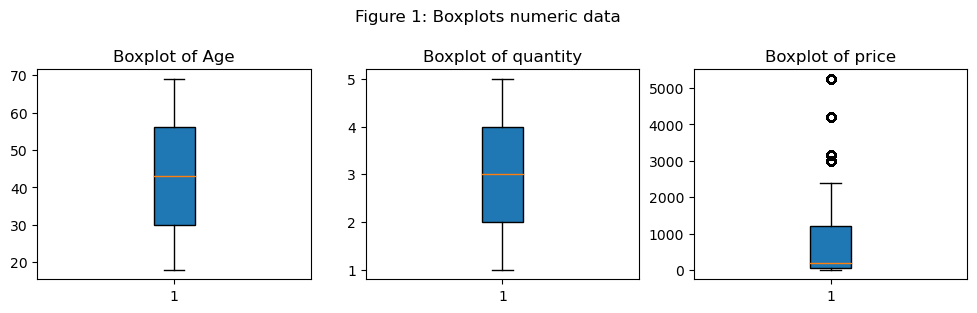

In [20]:
#now let´s see if we have any outliers, let´s do it printing boxplots for the data that is numeric
fig = plt.figure(figsize =(12, 6))
# Creating plot
plt.subplot(2, 3, 1)
plt.boxplot(cust_data1['age'], patch_artist=True)
plt.title('Boxplot of Age')

plt.subplot(2, 3, 2)
plt.boxplot(cust_data1['quantity'], patch_artist=True)
plt.title('Boxplot of quantity')

plt.subplot(2, 3, 3)
plt.boxplot(cust_data1['price'], patch_artist=True)
plt.title('Boxplot of price')
plt.suptitle('Figure 1: Boxplots numeric data', fontsize=12)

In [21]:
#We notice from the boxplot in Figure 1 that the price could potentially have some outliers, however it is worth checking the values of prices differentiated by the categories
#since prices for each of them might differ significantly. We are going to look for values that fall 1.5 times below or above our interquartile range for each category

def calculate_outliers_limits(df, category_name): #function definition
    
    category_df = df[df["category"] == category_name]    #Filter DataFrame by category
    # Calculate 25th and 75th percentiles
    percentile25 = category_df["price"].quantile(0.25)
    percentile75 = category_df["price"].quantile(0.75)
    # Calculate IQR and outlier limits
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    #print(f"The Lower limit for {category_name} is: {lower_limit}")
    print(f"The Upper limit for {category_name} is: {upper_limit}")
    print(f"Max price in {category_name}: {category_df['price'].max()}")

# Apply the function to each category
categories = ["Clothing", "Toys", "Shoes", "Food", "Books", "Technology", "Souvenir", "Cosmetics"]

for category in categories:
    calculate_outliers_limits(cust_data1, category)
#We check that max value is within the limits calculated (the lower limit is negative and all the values are positive, so no need to check for the min)

The Upper limit for Clothing is: 2100.56
Max price in Clothing: 1500.4
The Upper limit for Toys is: 250.88000000000002
Max price in Toys: 179.2
The Upper limit for Shoes is: 4201.19
Max price in Shoes: 3000.85
The Upper limit for Food is: 36.61
Max price in Food: 26.15
The Upper limit for Books is: 106.05000000000001
Max price in Books: 75.75
The Upper limit for Technology is: 7350.0
Max price in Technology: 5250.0
The Upper limit for Souvenir is: 82.11
Max price in Souvenir: 58.65
The Upper limit for Cosmetics is: 284.62
Max price in Cosmetics: 203.3


## 1.6 Find skewness and correct it if any

Text(0.5, 0.98, 'Figure 2: Frequency distribution numeric data')

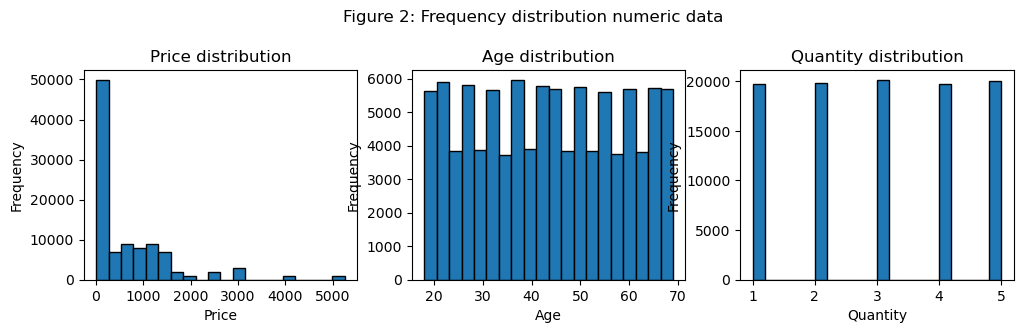

In [22]:
fig = plt.figure(figsize =(12, 6)) #Lets check the skewness for the age, price and quantity using the frequency distribution

plt.subplot(2, 3, 1)
plt.hist(cust_data1["price"], bins=20, edgecolor='black')
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.subplot(2, 3, 2)
plt.hist(cust_data1["age"], bins=20, edgecolor='black')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2, 3, 3)
plt.hist(cust_data1["quantity"], bins=20, edgecolor='black')
plt.title("Quantity distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.suptitle('Figure 2: Frequency distribution numeric data', fontsize=12)

In [23]:
#Figure 2 don´t tell us much for age and quantity and again for the price distribution it would make sense to graph the distribution for each category
#since for the price of all categories combined the price seems to be skewed
#we calculate the skewness for this 3 columns 
skewness_price = cust_data1["price"].skew()
print (f"the skewness for the price is {skewness_price}")
skewness_age = cust_data1["age"].skew()
print (f"the skewness for the age is {skewness_age}")
skewness_qty = cust_data1["quantity"].skew()
print (f"the skewness for the quantity is {skewness_qty}")

the skewness for the price is 2.2474444191397738
the skewness for the age is 0.009003516996840998
the skewness for the quantity is -0.0012424178976398604


In [24]:
#let´s see if there is any skewness for the price in the specific categories using .skew()

def skewness_calculator (df, category_name): #filter df by category
    
    category_df = df[df["category"] == category_name]
    skewness_price_category = category_df["price"].skew()
    print (f"the skewness for the price of {category_name} {skewness_price_category}")
    
categories = ["Clothing", "Toys", "Shoes", "Food", "Books", "Technology", "Souvenir", "Cosmetics"] #define categories
for category in categories: #apply function for every category
    skewness_calculator (cust_data1, category)
    #even though for the price of all categories combined having a skew value of 2.2 after checking the price for each category we can conclude it isn´t skewed 

the skewness for the price of Clothing 0.0012255660783947616
the skewness for the price of Toys -0.01677479443809166
the skewness for the price of Shoes -0.005535045463067792
the skewness for the price of Food 0.004242192257043394
the skewness for the price of Books 0.004754213782919291
the skewness for the price of Technology -0.004852633938699515
the skewness for the price of Souvenir 0.030970405173599357
the skewness for the price of Cosmetics -0.01055093796106691


In [25]:
# we create the specific categories df for later use in the code                       
clothing_df = cust_data1[cust_data1["category"] == "Clothing"]
toys_df = cust_data1[cust_data1["category"] == "Toys"]
tech_df = cust_data1[cust_data1["category"] == "Technology"]
shoes_df = cust_data1[cust_data1["category"] == "Shoes"]
book_df = cust_data1[cust_data1["category"] == "Books"]
sou_df = cust_data1[cust_data1["category"] == "Souvenir"]
cosm_df = cust_data1[cust_data1["category"] == "Cosmetics"]
food_df = cust_data1[cust_data1["category"] == "Food"]

# Section 2: Analysis 
    2.1 Average money spent in each categories separated by Males and Females
    2.2 Correlation between average money spent and age
    2.3 Spending by category in each mall

## 2.1 Average money spent in each categories separated by Males and Females

In [26]:
#first we are going to plot the average spending for males and females.  money spent is: quantity multiplied by price
#Average money spent for Males
warnings.filterwarnings("ignore")
male_df = cust_data1[cust_data1["gender"]== "Male"] #we create a df of only males
male_df.loc()[:,"total_spent"]= male_df["quantity"] * male_df["price"] # we use loc to speficy we are safely creating a new column
total_spenditure_by_category_male = male_df.groupby("category")["total_spent"].mean()
#print(total_spenditure_by_category_male) (commented for space)

#Total spent by Females
warnings.filterwarnings("ignore")
female_df = cust_data1[cust_data1["gender"]== "Female"] #we create a df of only females
female_df.loc()[:,"total_spent"]= female_df["quantity"] * female_df["price"] # we use loc to speficy we are safely creating a new column
total_spenditure_by_category_female = female_df.groupby("category")["total_spent"].mean()
#print(total_spenditure_by_category_female) (commented for space)

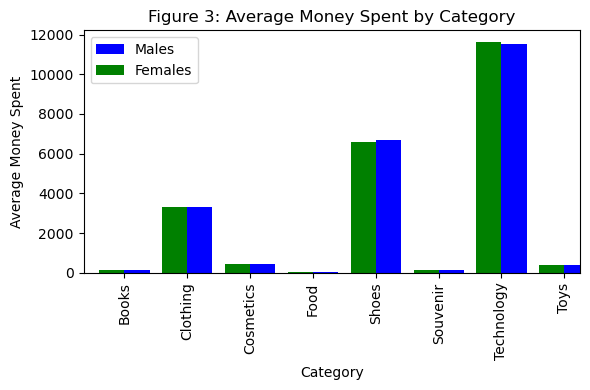

In [27]:
# we create a figure with the both male and females for better visualization
fig, ax = plt.subplots(figsize=(6, 4))
#ploting males and females with different colors
total_spenditure_by_category_male.plot(kind='bar', ax=ax, color='blue', position=0, width=0.4, label='Males')
total_spenditure_by_category_female.plot(kind='bar', ax=ax, color='green', position=1, width=0.4, label='Females')

ax.set_title("Figure 3: Average Money Spent by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Average Money Spent")
ax.legend()
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Figure 4: Boxplot Males and Females (Clothing)')

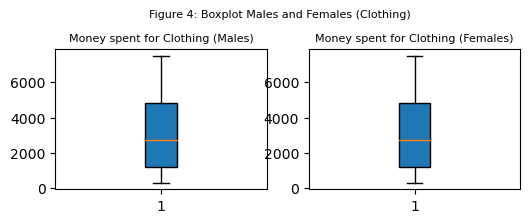

In [28]:
#we can notice from figure 3 that three categories stand out, lets see if we find a difference in these 3 categories between males and females using boxplots
clothing_dfmale = male_df[male_df["category"]=="Clothing"]
clothing_dffemale = female_df[female_df["category"]=="Clothing"]

fig = plt.figure(figsize =(6, 4)) 
plt.subplot(2, 2, 1) 
plt.boxplot(clothing_dfmale["total_spent"], patch_artist=True,)
plt.title('Money spent for Clothing (Males)', fontsize=8)
plt.subplot(2, 2, 2)
plt.boxplot(clothing_dffemale["total_spent"], patch_artist=True)
plt.title('Money spent for Clothing (Females)', fontsize=8)
plt.suptitle('Figure 4: Boxplot Males and Females (Clothing)', fontsize=8)

Text(0.5, 0.98, 'Figure 5: Boxplot Males and Females (Shoes)')

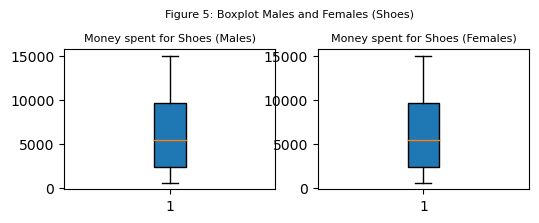

In [29]:
shoes_dfmale = male_df[male_df["category"]=="Shoes"]
shoes_dffemale = female_df[female_df["category"]=="Shoes"]

fig = plt.figure(figsize =(6, 4)) 
plt.subplot(2, 2, 1) 
plt.boxplot(shoes_dfmale["total_spent"], patch_artist=True)
plt.title("Money spent for Shoes (Males)", fontsize=8)
plt.subplot(2, 2, 2)
plt.boxplot(shoes_dffemale["total_spent"], patch_artist=True)
plt.title("Money spent for Shoes (Females)", fontsize=8)
plt.suptitle('Figure 5: Boxplot Males and Females (Shoes)', fontsize=8)

In [30]:
tech_dfmale = male_df[male_df["category"]=="Technology"]
tech_dffemale = female_df[female_df["category"]=="Technology"]

Text(0.5, 0.98, 'Figure 6: Boxplot Males and Females (Technology)')

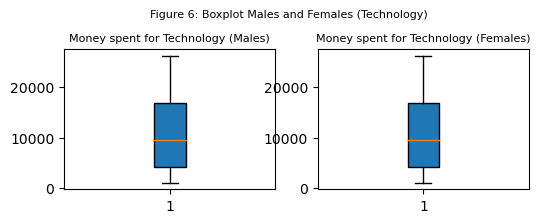

In [31]:
fig = plt.figure(figsize =(6, 4)) 
# Creating plot
plt.subplot(2, 2, 1) 
plt.boxplot(tech_dfmale["total_spent"], patch_artist=True)
plt.title('Money spent for Technology (Males)', fontsize=8)
plt.subplot(2, 2, 2)
plt.boxplot(tech_dffemale["total_spent"], patch_artist=True)
plt.title('Money spent for Technology (Females)',fontsize=8)
plt.suptitle('Figure 6: Boxplot Males and Females (Technology)', fontsize=8)
#from the 3 boxplots  figures 4,5 and 6 we don´t see any revealing behavior when comparing men and women

### Insightful analysis 1: Total money spent in categories By males and females
From the bar graphs (figure 3) we can see that the patterns of money spent for both Males and Females are similar. The three categories were the most money is spent are Technology, Shoes and Clothing in that order. In the figure 3 we observe women spent more money in avg for technology, men spent more in avg for shoes and clothing avg is similar for both genders. There is more women(1.5men) than men spending money at the mall, however when we check the average for all categories men spent more money than women by just 0.4%. The category in which both genders spent least in average was Food.

**Recomendation:** The malls should keep high levels of advertisement for Clothing, Shoes and Technology to keep high levels of revenue since these are the most attractive categories. If the malls want some categories to grow they should start working with Cosmetics and Toys.

## 2.2 Correlation between average money spent and age

In [32]:
#we will create a scatter plot of ages. We need to first group the total_spent in ages so the data is more visible
male_total_spent_by_age = male_df.groupby('age')['total_spent'].sum()
female_total_spent_by_age = female_df.groupby('age')['total_spent'].sum()

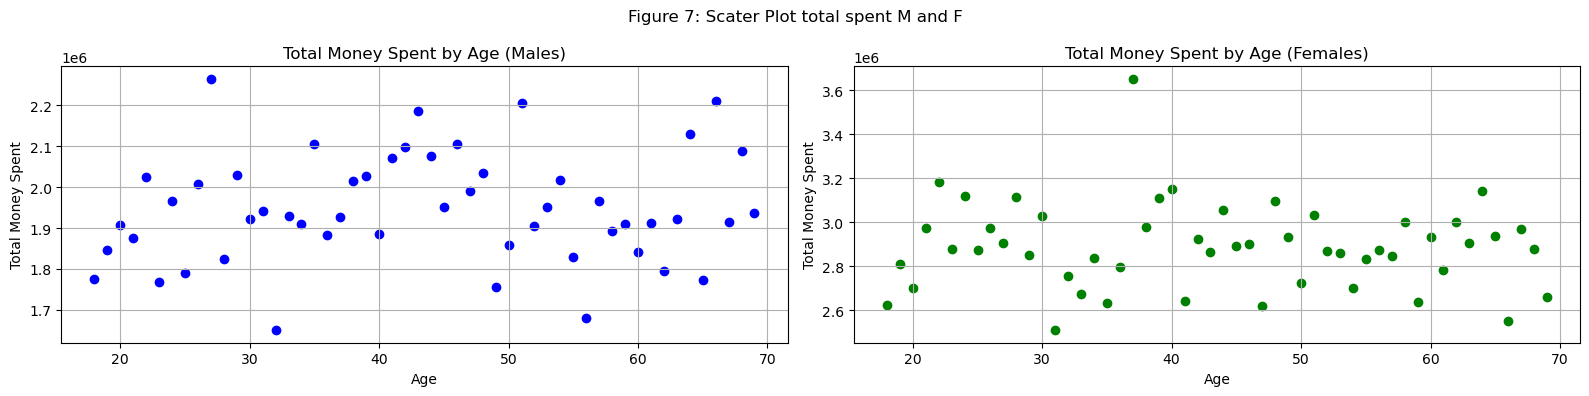

In [33]:
# lets now plot scatter for boths males and females total spenditure grouped by age
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.scatter(male_total_spent_by_age.index, male_total_spent_by_age.values, color="blue")
plt.title("Total Money Spent by Age (Males)")
plt.xlabel("Age")
plt.ylabel("Total Money Spent")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(female_total_spent_by_age.index, female_total_spent_by_age.values, color="green")
plt.title("Total Money Spent by Age (Females)")
plt.xlabel("Age")
plt.ylabel("Total Money Spent")
plt.grid(True)

plt.suptitle('Figure 7: Scater Plot total spent M and F', fontsize=12)
plt.tight_layout()
plt.show()

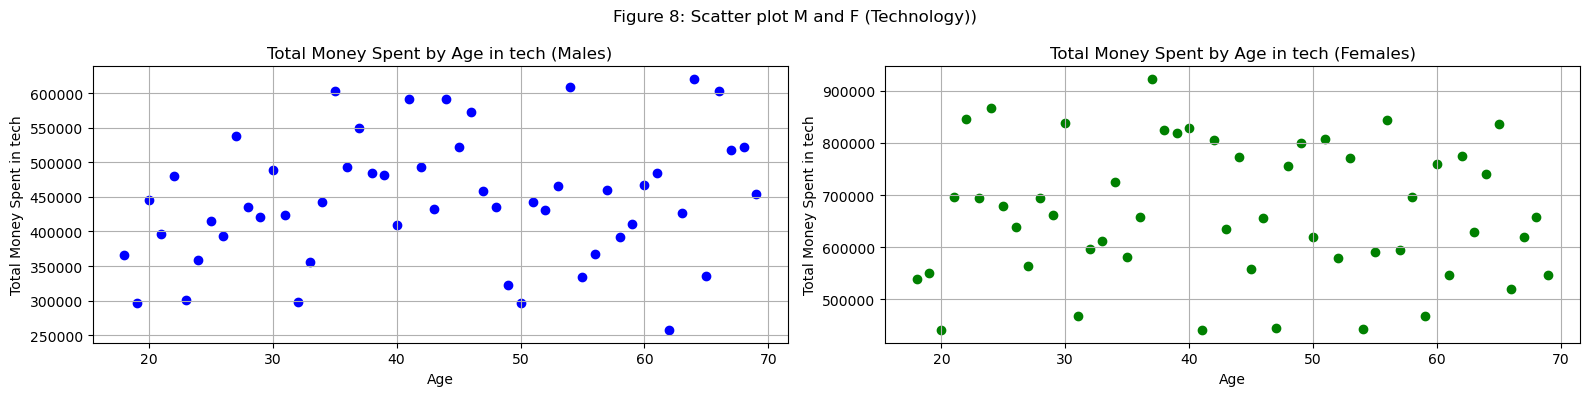

In [34]:
#since the scater plot (figure 7) is not showing us a correlation we can also try to do a scatter plot for the specific categories
#to try to get insights from these data lets take a look in technology

male_total_spent_by_age_tech = tech_dfmale.groupby('age')['total_spent'].sum()
female_total_spent_by_age_tech = tech_dffemale.groupby('age')['total_spent'].sum()

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.scatter(male_total_spent_by_age_tech.index, male_total_spent_by_age_tech.values, color="blue")
plt.title("Total Money Spent by Age in tech (Males)")
plt.xlabel("Age")
plt.ylabel("Total Money Spent in tech")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(female_total_spent_by_age_tech.index, female_total_spent_by_age_tech.values, color="green")
plt.title("Total Money Spent by Age in tech (Females)")
plt.xlabel("Age")
plt.ylabel("Total Money Spent in tech")
plt.grid(True)

plt.suptitle('Figure 8: Scatter plot M and F (Technology))', fontsize=12)
plt.tight_layout()
plt.show()


In [35]:
#lets try and calculate the correlation between the age and the total spent for males and females 
correlation_male = male_df["age"].corr(male_df["total_spent"])
print("Correlation between age and total_spent for males:", correlation_male)
correlation_female = female_df["age"].corr(female_df["total_spent"])
print("Correlation between age and total_spent for females:", correlation_female)

Correlation between age and total_spent for males: 0.008179077800557757
Correlation between age and total_spent for females: -0.000939006552443146


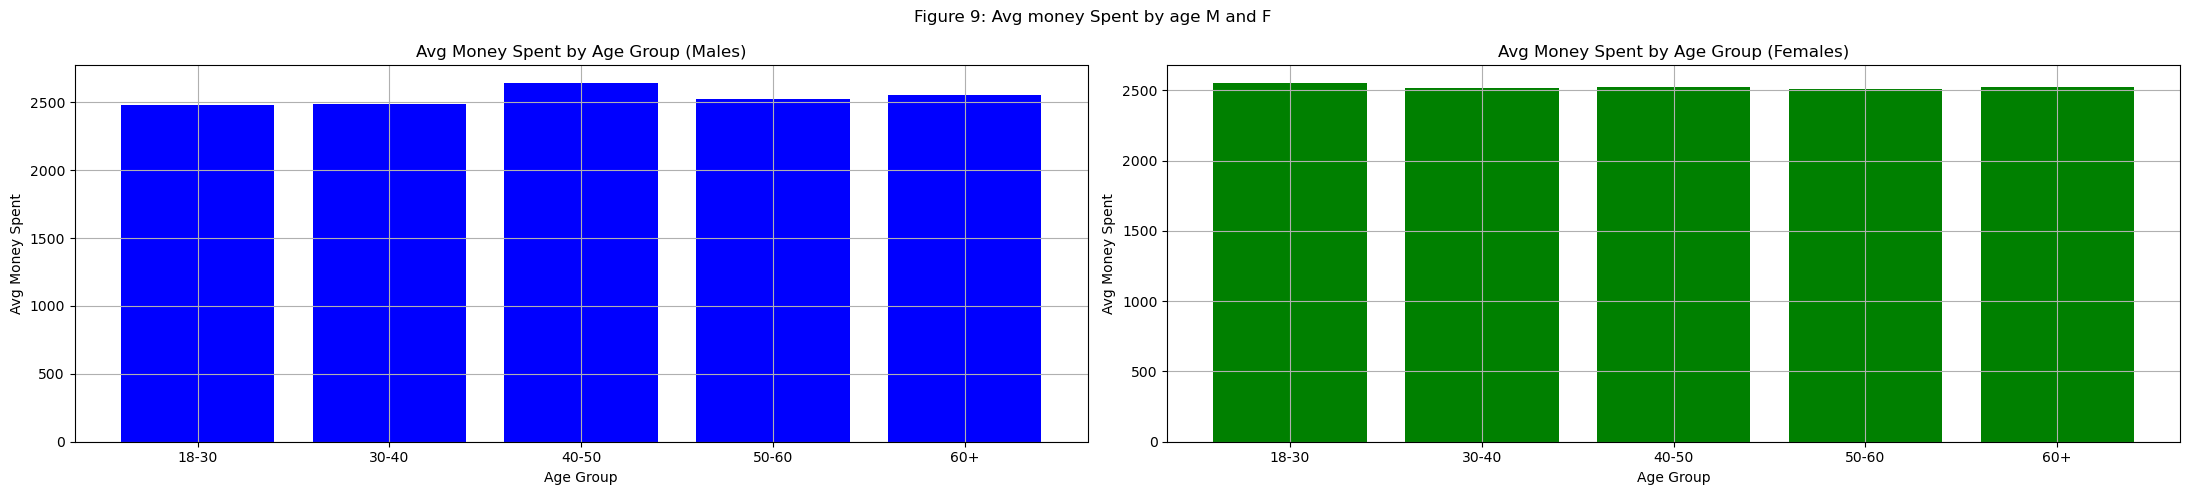

In [36]:
#this scaterplots (figures 7 and 8) show us there is no clear relationship between the age and the total money spent even for specific categories
#The correlation is insignificant. 
#lets divide the ages in group to try to find how the sales are in specific groups since the scatter plot doesn´t show us a clear trend 
warnings.filterwarnings("ignore")
# first of all we define the age groups we are going to use, the youngest buyers are 18yo so we create a group of 18-30
bins = [18, 30, 40, 50, 60, float("inf")]  # float('inf') represents 60+
labels = ["18-30", "30-40", "40-50", "50-60", "60+"]

# now we create a new column for each of the each groups
male_df["age_group"] = pd.cut(male_df["age"], bins=bins, labels=labels, right=False) 
female_df["age_group"] = pd.cut(female_df["age"], bins=bins, labels=labels, right=False)

# Now we group the ages by the bins created and sum the total spent for each group, a series is created in which the index 
#are the age groups and the values are the mean of total_spent column of that age group
male_total_spent_by_age_group = male_df.groupby("age_group")["total_spent"].mean()
female_total_spent_by_age_group = female_df.groupby("age_group")["total_spent"].mean()

# lets plot now the average total money spent by males and females in each of the ages groups created
plt.figure(figsize=(22, 5))
plt.subplot(1, 2, 1)
plt.bar(male_total_spent_by_age_group.index, male_total_spent_by_age_group.values, color="blue") 
plt.title("Avg Money Spent by Age Group (Males)")
plt.xlabel("Age Group")
plt.ylabel("Avg Money Spent")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(female_total_spent_by_age_group.index, female_total_spent_by_age_group.values, color="green")
plt.title("Avg Money Spent by Age Group (Females)")
plt.xlabel("Age Group")
plt.ylabel("Avg Money Spent")
plt.grid(True)

plt.suptitle('Figure 9: Avg money Spent by age M and F ', fontsize=12)
plt.tight_layout()
plt.show()
# we don´t appreciate much difference between the age groups in fig 9 

### Insightful analysis 2: Average Money spent vs Age

From the scatter plots fig 7 we cannot osbserve a clear trend or correlation between the total money spent and the age neither for males or females. Additionally, the bar plot in fig 9,  avg money spent for different age groups varies just little by age group, with males ages 40-50 with a better avg and femaels 18-30. the rest of the group ages have similar avg spending level.

The correlation between age and total spent for both males and females is not significant. 

**Conclusion:** There is no strong relationship between the age and average money spent. Keep attracting customers from all ages, while taking special consideration for males 40-50 and females 18-30 if needed.

## 2.3 Spending by category in each mall

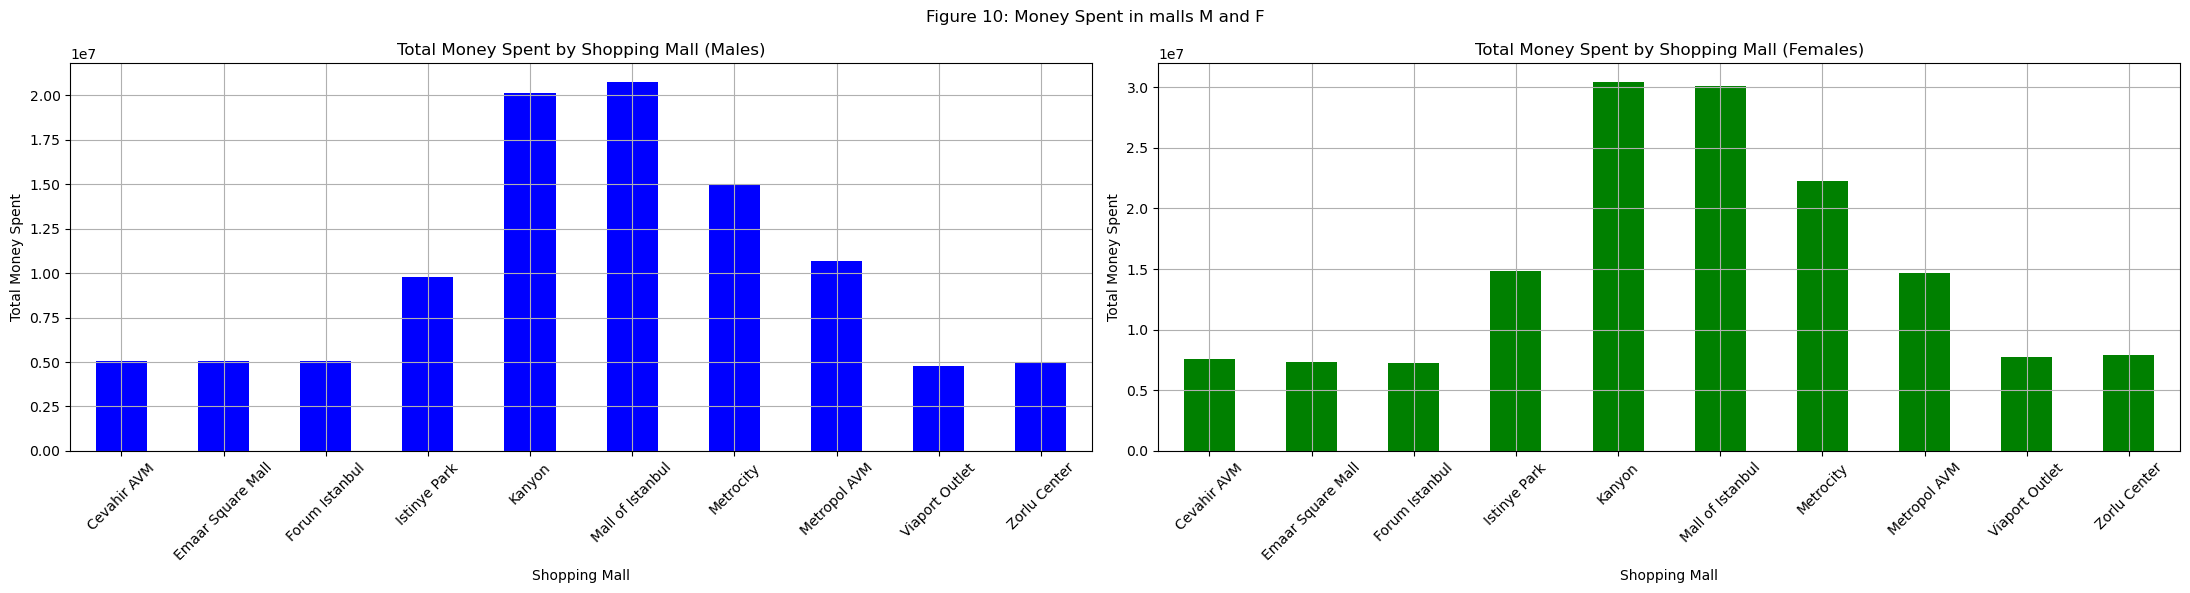

In [37]:
#we want to see how money is spent across the malls
# we create the series grouping by mall and sum the total spent
male_total_spent_by_mall = male_df.groupby('shopping_mall')['total_spent'].sum()
female_total_spent_by_mall = female_df.groupby('shopping_mall')['total_spent'].sum()

plt.figure(figsize=(22, 6))

plt.subplot(1, 2, 1)
male_total_spent_by_mall.plot(kind='bar', color='blue', ax=plt.gca())
plt.title('Total Money Spent by Shopping Mall (Males)')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
female_total_spent_by_mall.plot(kind='bar', color='green', ax=plt.gca())
plt.title('Total Money Spent by Shopping Mall (Females)')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.grid(True)

plt.suptitle('Figure 10: Money Spent in malls M and F', fontsize=12)
plt.tight_layout()
plt.show()

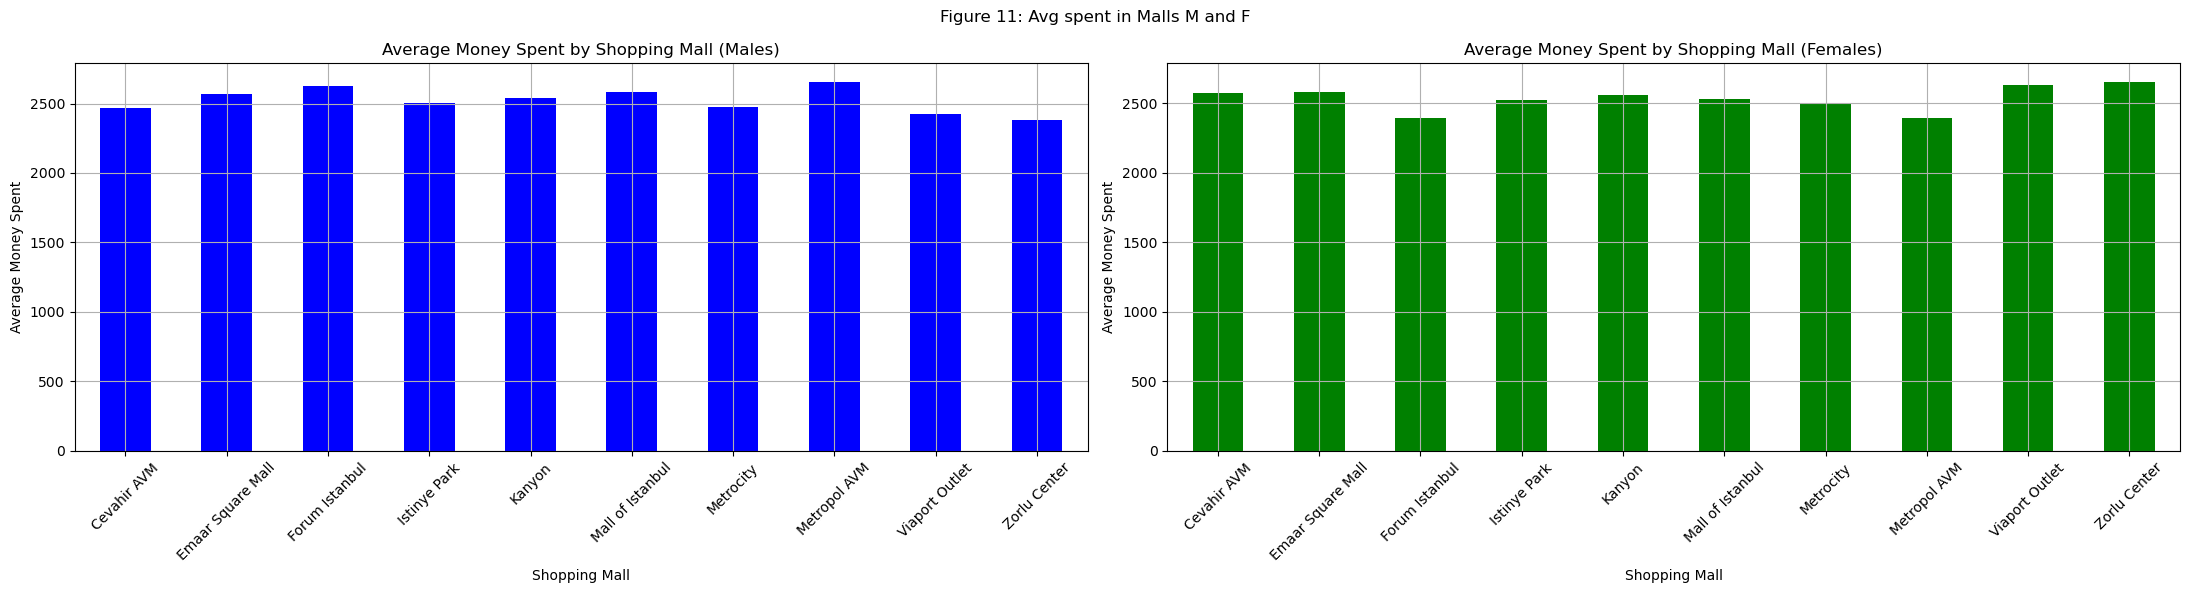

In [38]:
#we can notice clearly in Fig 10 in which malls most money is spent. let´s check the average to understand if the same pattern is found
# we create the series grouping by mall and averaging the total spent
male_avg_spent_by_mall = male_df.groupby('shopping_mall')['total_spent'].mean()
female_avg_spent_by_mall = female_df.groupby('shopping_mall')['total_spent'].mean()

plt.figure(figsize=(22, 6))

plt.subplot(1, 2, 1)
male_avg_spent_by_mall.plot(kind='bar', color='blue', ax=plt.gca())
plt.title('Average Money Spent by Shopping Mall (Males)')
plt.xlabel('Shopping Mall')
plt.ylabel('Average Money Spent')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
female_avg_spent_by_mall.plot(kind='bar', color='green', ax=plt.gca())
plt.title('Average Money Spent by Shopping Mall (Females)')
plt.xlabel('Shopping Mall')
plt.ylabel('Average Money Spent')
plt.xticks(rotation=45)
plt.grid(True)

plt.suptitle('Figure 11: Avg spent in Malls M and F', fontsize=12)
plt.tight_layout()
plt.show()

### Insightful analysis 3: Money spent in each mall

From figure 10 we see that Mall of Istanbul, Kanyon and Metrocity are the malls were more money is spent, it might be related to the type of stores these malls have. When we look at the average in figure 11 all malls have similar averages.

It is also noticeable that males spent more money in the Mall of Istanbul while women spent more money in the Kanyon mall

**Recomendation:** Focus on keeping high income in these 3 malls and continue targeting both males and females equally to increase sells

# Section 3: Recommendations 
    3.1 Sales by Payment Method
    3.2 Sales Trend Over Time

## 3.1 Sales by Payment Method

In [39]:
# we need to count occurrences of each payment method for males and females
payment_method_counts = cust_data1["payment_method"].value_counts() # we count how many users used each payment method
male_payment_method_counts = male_df["payment_method"].value_counts() # for males
female_payment_method_counts = female_df["payment_method"].value_counts() # for females
print (f"total count {payment_method_counts}")
#print (f"total count {male_payment_method_counts}")
#print (f"total count {female_payment_method_counts}")

total count payment_method
Cash           44446
Credit Card    34931
Debit Card     20077
Name: count, dtype: int64


In [40]:
#we now know which method of payment is preferred lets calculate a proportion of each of them
payment_method_per = cust_data1["payment_method"].value_counts(normalize=True)*100
male_payment_method_per = male_df["payment_method"].value_counts(normalize=True)*100
female_payment_method_per = female_df["payment_method"].value_counts(normalize=True)*100
print (f"preferred payment method for all {payment_method_per}")
#the preferred method and the proportion is similar for the total and when divided in males and females

preferred payment method for all payment_method
Cash           44.690007
Credit Card    35.122770
Debit Card     20.187222
Name: proportion, dtype: float64


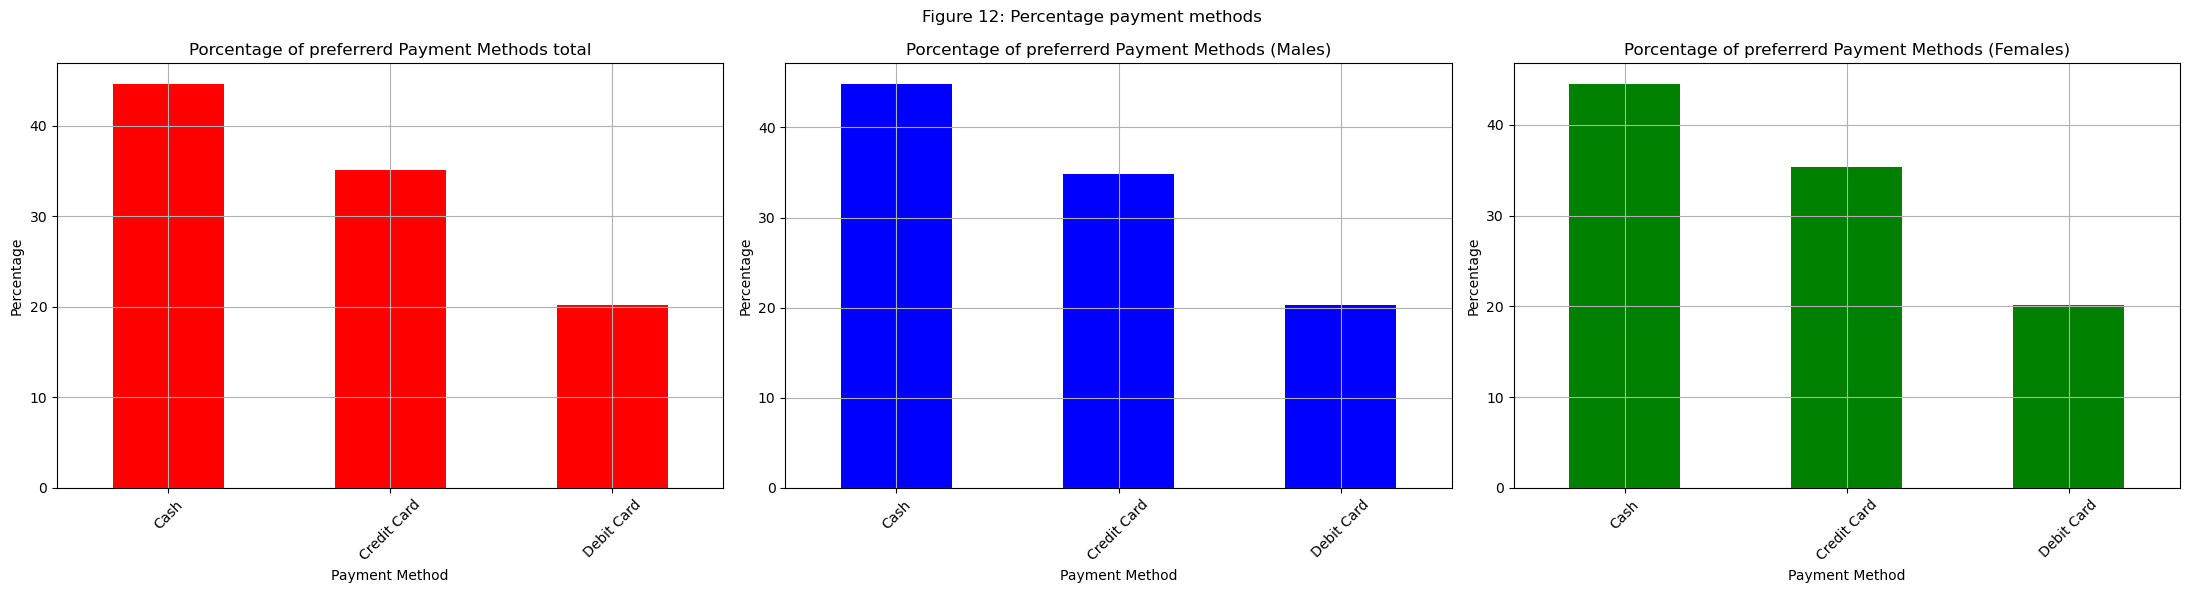

In [41]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 3,1)
payment_method_per.plot(kind='bar', color='red', ax=plt.gca())
plt.title('Porcentage of preferrerd Payment Methods total')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 3, 2) 
male_payment_method_per.plot(kind='bar', color='blue', ax=plt.gca())
plt.title('Porcentage of preferrerd Payment Methods (Males)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 3, 3)
female_payment_method_per.plot(kind='bar', color='green', ax=plt.gca())
plt.title('Porcentage of preferrerd Payment Methods (Females)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.suptitle('Figure 12: Percentage payment methods ', fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
#let´s see if there is a difference in the amount of money spent by each category
cust_data2 = cust_data1 #we create a new df
cust_data2.loc()[:,"total_spent"]= cust_data1["quantity"] * cust_data2["price"] # we use loc to speficy we are safely creating a new column
payment_method_total = cust_data2.groupby("payment_method")["total_spent"].sum()# Group by payment method and sum the total_spent for males
payment_method_total

payment_method
Cash           1.128274e+08
Credit Card    8.807712e+07
Debit Card     5.059098e+07
Name: total_spent, dtype: float64

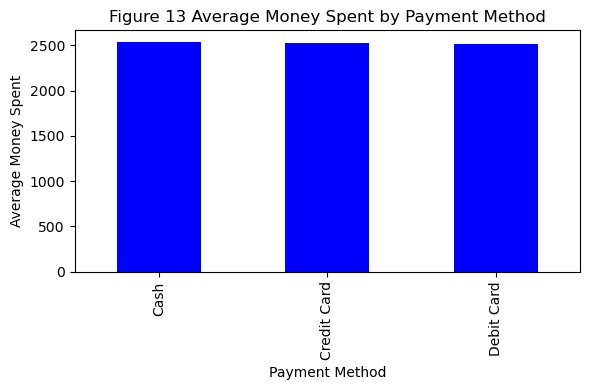

In [43]:
cust_data2 = cust_data1 #we create a new df  to create the new column
cust_data2.loc()[:,"total_spent"]= cust_data1["quantity"] * cust_data2["price"] # we use loc to speficy we are safely creating a new column
payment_method_total_avg = cust_data2.groupby("payment_method")["total_spent"].mean()
payment_method_total_avg.plot(kind='bar', color='blue', figsize=(6, 4))
plt.title("Figure 13 Average Money Spent by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Average Money Spent")
plt.tight_layout()
plt.show()
#the average money spent is similar for all methods (figure 13)

In [44]:
#lets look at it for males and females
male_payment_method_total_avg = male_df.groupby("payment_method")["total_spent"].mean()
female_payment_method_total_avg = female_df.groupby("payment_method")["total_spent"].mean()
print(f"Male {male_payment_method_total_avg}")

Male payment_method
Cash           2522.930439
Credit Card    2528.830019
Debit Card     2567.020516
Name: total_spent, dtype: float64


In [45]:
print(f"Female {female_payment_method_total_avg}")

Female payment_method
Cash           2549.082894
Credit Card    2516.577502
Debit Card     2487.838568
Name: total_spent, dtype: float64


### Insightful analysis 4
More people uses cash as paymet method followed (fig 12) by Credit Card and Debit Card. 44.6% percent of purchases are done by cash, 35.1% by credit cards and 20.1% by debit cards (fig 12). 
When we check the amount of money spent in these 3 methods we find that the Cash has the largest amount of money followed by Credit cards and debit cards. However the average money (fig 13) spent using these payment methods are all similar (around 2500). When looking at the data by genders, Males spent more money on average using debit cards while females prefered Cash 

**Recomendation**: Keep cash payment method open and easy to use as it is the most used and attracts most cash. Don´t disencourage the use of credit card and debit card.


## 3.2 Sales Trend Over Time

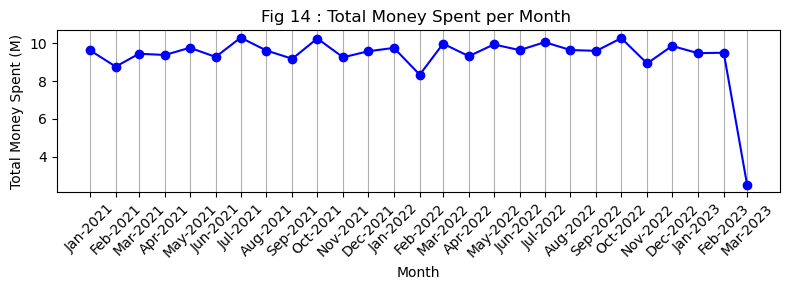

In [46]:
# we need to create a column for the month 
# Step 1: Convert the invoice_date to datetime format
cust_data2['invoice_date'] = pd.to_datetime(cust_data2['invoice_date'], format='%m/%d/%Y')

# Step 2: Create a new column for the start of each month (monthly bins)
cust_data2['month_year'] = cust_data2['invoice_date'].dt.to_period('M').dt.to_timestamp()

# Step 3: Group by the month_year and sum the total_spent
monthly_total_spent = cust_data2.groupby('month_year')['total_spent'].sum()/1000000

# Step 4: Create a date range covering all months from the first to the last date
full_month_range = pd.date_range(start=monthly_total_spent.index.min(), 
                                 end=monthly_total_spent.index.max(), 
                                 freq='MS')

# Step 5: Reindex to include all months, filling missing months with 0
monthly_total_spent = monthly_total_spent.reindex(full_month_range, fill_value=0)

# Step 6: Plot the trendline
plt.figure(figsize=(8, 3))
plt.plot(monthly_total_spent.index, monthly_total_spent.values, marker='o', color='blue')

plt.title('Fig 14 : Total Money Spent per Month ')
plt.xlabel('Month')
plt.ylabel('Total Money Spent (M)')
plt.xticks(monthly_total_spent.index, monthly_total_spent.index.strftime('%b-%Y'), rotation=45)
plt.grid(True, axis='x')  # Add vertical gridlines for each month

plt.tight_layout()
plt.show()
#the total_sent in march is low because the data isn´t complete for the whole month


In [47]:
#the total_sent in march is low because the data isn´t complete for the whole month
#we create the column of total_spent and a column for the months for our data frames for specific categories using the next function 

import warnings
warnings.filterwarnings("ignore")

def process_category(df, cust_data): #define function
    df["total_spent"] = cust_data["quantity"] * cust_data["price"]
    df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y')
    df['month_year'] = df['invoice_date'].dt.to_period('M').dt.to_timestamp()
    monthly_total_spent = df.groupby('month_year')['total_spent'].sum()
    full_month_range = pd.date_range(start=monthly_total_spent.index.min(), 
                                     end=monthly_total_spent.index.max(), 
                                     freq='MS')
    return monthly_total_spent.reindex(full_month_range, fill_value=0)

# Apply the function to all DataFrames
monthly_total_spent_cloth = process_category(clothing_df, cust_data2)
monthly_total_spent_shoes = process_category(shoes_df, cust_data2)
monthly_total_spent_tech = process_category(tech_df, cust_data2)
monthly_total_spent_toys = process_category(toys_df, cust_data2)
monthly_total_spent_food = process_category(food_df, cust_data2)
monthly_total_spent_cosm = process_category(cosm_df, cust_data2)
monthly_total_spent_sou = process_category(sou_df, cust_data2)
monthly_total_spent_book = process_category(book_df, cust_data2)


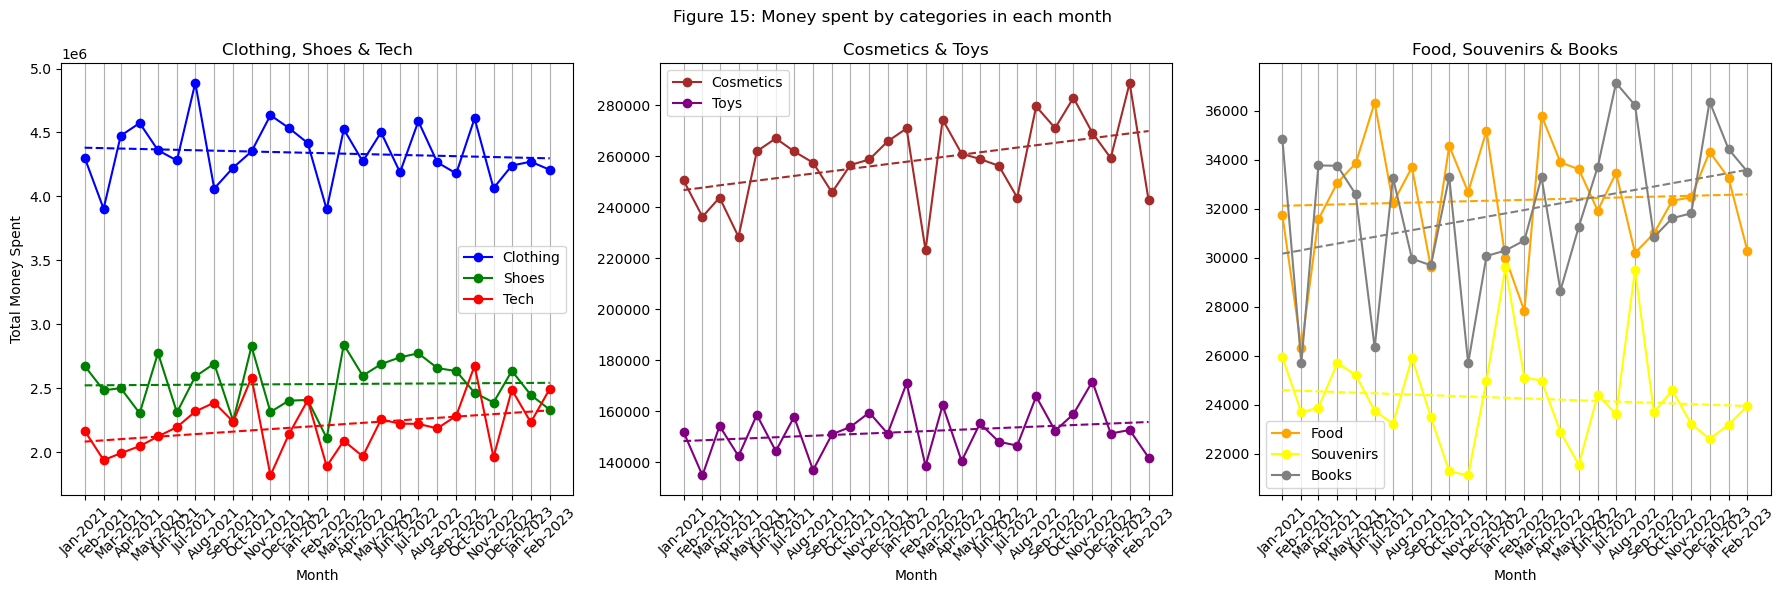

In [48]:
#we divide the categories so it is easier to understand since they have different levels of spending and exclude march since we don´t have the data for 
#the complete month and it affects our trend 

# define function to add a trend line to the plot
def add_trend_line(ax, x_data, y_data, color):
    # Fit a linear regression line
    z = np.polyfit(range(len(x_data)), y_data, 1)
    p = np.poly1d(z)
    ax.plot(x_data, p(range(len(x_data))), linestyle='--', color=color)

# Exclude march
monthly_total_spent_cloth_ex = monthly_total_spent_cloth[:-1]
monthly_total_spent_shoes_ex = monthly_total_spent_shoes[:-1]
monthly_total_spent_tech_ex = monthly_total_spent_tech[:-1]
monthly_total_spent_cosm_ex = monthly_total_spent_cosm[:-1]
monthly_total_spent_toys_ex = monthly_total_spent_toys[:-1]
monthly_total_spent_food_ex = monthly_total_spent_food[:-1]
monthly_total_spent_sou_ex = monthly_total_spent_sou[:-1]
monthly_total_spent_book_ex = monthly_total_spent_book[:-1]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting the first set of trend lines
axes[0].plot(monthly_total_spent_cloth_ex.index, monthly_total_spent_cloth_ex.values, 
             marker='o', color='blue', label='Clothing')
add_trend_line(axes[0], monthly_total_spent_cloth_ex.index, monthly_total_spent_cloth_ex.values, color='blue')

axes[0].plot(monthly_total_spent_shoes_ex.index, monthly_total_spent_shoes_ex.values, 
             marker='o', color='green', label='Shoes')
add_trend_line(axes[0], monthly_total_spent_shoes_ex.index, monthly_total_spent_shoes_ex.values, color='green')

axes[0].plot(monthly_total_spent_tech_ex.index, monthly_total_spent_tech_ex.values, 
             marker='o', color='red', label='Tech')
add_trend_line(axes[0], monthly_total_spent_tech_ex.index, monthly_total_spent_tech_ex.values, color='red')

axes[0].set_title('Clothing, Shoes & Tech')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Money Spent')
axes[0].legend()
axes[0].grid(True, axis='x')
axes[0].set_xticks(monthly_total_spent_cloth_ex.index)
axes[0].set_xticklabels(monthly_total_spent_cloth_ex.index.strftime('%b-%Y'), rotation=45)

# Plotting the second set of trend lines
axes[1].plot(monthly_total_spent_cosm_ex.index, monthly_total_spent_cosm_ex.values, 
             marker='o', color='brown', label='Cosmetics')
add_trend_line(axes[1], monthly_total_spent_cosm_ex.index, monthly_total_spent_cosm_ex.values, color='brown')

axes[1].plot(monthly_total_spent_toys_ex.index, monthly_total_spent_toys_ex.values, 
             marker='o', color='purple', label='Toys')
add_trend_line(axes[1], monthly_total_spent_toys_ex.index, monthly_total_spent_toys_ex.values, color='purple')

axes[1].set_title('Cosmetics & Toys')
axes[1].set_xlabel('Month')
axes[1].legend()
axes[1].grid(True, axis='x')
axes[1].set_xticks(monthly_total_spent_cosm_ex.index)
axes[1].set_xticklabels(monthly_total_spent_cosm_ex.index.strftime('%b-%Y'), rotation=45)

# Plotting the third set of trend lines
axes[2].plot(monthly_total_spent_food_ex.index, monthly_total_spent_food_ex.values, 
             marker='o', color='orange', label='Food')
add_trend_line(axes[2], monthly_total_spent_food_ex.index, monthly_total_spent_food_ex.values, color='orange')

axes[2].plot(monthly_total_spent_sou_ex.index, monthly_total_spent_sou_ex.values, 
             marker='o', color='yellow', label='Souvenirs')
add_trend_line(axes[2], monthly_total_spent_sou_ex.index, monthly_total_spent_sou_ex.values, color='yellow')

axes[2].plot(monthly_total_spent_book_ex.index, monthly_total_spent_book_ex.values, 
             marker='o', color='gray', label='Books')
add_trend_line(axes[2], monthly_total_spent_book_ex.index, monthly_total_spent_book_ex.values, color='gray')

axes[2].set_title('Food, Souvenirs & Books')
axes[2].set_xlabel('Month')
axes[2].legend()
axes[2].grid(True, axis='x')
axes[2].set_xticks(monthly_total_spent_food_ex.index)
axes[2].set_xticklabels(monthly_total_spent_food_ex.index.strftime('%b-%Y'), rotation=45)

plt.suptitle('Figure 15: Money spent by categories in each month ', fontsize=12)
plt.tight_layout()
plt.show()


### Insightful analysis 5
When plotting the money spent troughout the months (fig 14, jan 2021 until few days of march 2023) we don´t notice any seasonality or trends. February 2021 was the month with least sales with 8.3 millions and July 2021 was the month with the most sales with 10.3 millions. March shows little sales since the data is incomplete for that month. When looking at the categories (fig 15) we  can see:

Technology: Increased steadily for a period of 6 months and then had a different behavior even decreasing continuously for a period of 3 months in 2022. 
Food and Books category shows sudden big drops, need to undertand the reason.
Cosmetics: Increasing with time. A category with potential to evaluate.

**Recomendation**: For categories with clear growing trends continue the current strategies to maintain growth. For categories that have experienced significant drops, implement recovery strategies to reverse these declines. Clothing, the category with highest spent overall shows a decrease in this period of time which needs to be adressed.

